In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [4]:
total = pd.read_csv('./total3.csv', encoding='utf-8')
maechul = pd.read_csv('./total19_23.csv', encoding='utf-8')

In [5]:
total = total.drop(['Unnamed: 0'], axis=1)
maechul = maechul.drop(['Unnamed: 0'], axis=1)

In [40]:
total = total.sort_values(by='기준년분기코드', ascending=True)

In [41]:
total

,기준년분기코드,행정동코드,월평균소득금액,음식지출총금액,유사업종점포수,개업점포수,폐업점포수,당월매출금액,총직장인구수,총상주인구수,총유동인구수
1857,20191,11290525,3664622,1011937000,90,2,4,4328200306,4429,12823,4444697
1960,20191,11200590,3654571,192261000,28,0,3,456182353,986,15796,4271714
1959,20191,11200580,4064726,66906000,12,0,0,219110112,464,16502,3455446
1958,20191,11200520,3555413,300062000,48,2,0,1156401286,1218,18133,4486970
1957,20191,11170570,3955417,248116000,54,5,3,1103200412,5206,14933,3484892
...,...,...,...,...,...,...,...,...,...,...,...
1405,20234,11710632,3910198,1526342000,115,6,6,8085087192,10171,31488,6197742
1404,20234,11650520,5196131,4127886000,262,14,9,31165275563,67858,17183,6791734
1403,20234,11680630,4101144,5519540000,304,15,10,43643536399,33305,20756,10010985
1401,20234,11650621,4557937,1474917000,119,0,4,11522249834,21837,22692,6565906


In [3]:
total2 = pd.read_csv('./ffinal_total4.csv', encoding='utf-8')

In [7]:
total2 = total2.drop(['Unnamed: 0'], axis=1)

In [5]:
total2.columns

Index(['Unnamed: 0', '기준년분기코드', '행정동코드', '월평균소득금액', '음식지출총금액', '유사업종점포수',
       '개업점포수', '폐업점포수', '당월매출금액', '총직장인구수', '총상주인구수', '총유동인구수', '환산전체',
       '환산1층', '환산그외'],
      dtype='object')

In [43]:
maechul = total[['당월매출금액']]
maechul

,당월매출금액
1857,4328200306
1960,456182353
1959,219110112
1958,1156401286
1957,1103200412
...,...
1405,8085087192
1404,31165275563
1403,43643536399
1401,11522249834


In [8]:
#상관관계 높은 순으로 보기

# 숫자형 데이터 선택
total_num = total2.select_dtypes(include=['int64', 'float64'])
# 당월_매출_금액과의 상관관계 계산
corr_ = total_num.corr()['당월매출금액']
# 절대값 기준으로 상관관계 정렬
sorted_ = corr_.abs().sort_values(ascending=False)
sorted_


당월매출금액     1.000000
음식지출총금액    0.903567
유사업종점포수    0.882786
폐업점포수      0.756771
개업점포수      0.691676
총직장인구수     0.656963
총유동인구수     0.429380
환산전체       0.286917
환산1층       0.268334
환산그외       0.249555
월평균소득금액    0.156896
기준년분기코드    0.154017
행정동코드      0.096096
총상주인구수     0.063227
Name: 당월매출금액, dtype: float64

In [9]:
total.columns

Index(['기준년분기코드', '행정동코드', '월평균소득금액', '음식지출총금액', '유사업종점포수', '개업점포수', '폐업점포수',
       '당월매출금액', '총직장인구수', '총상주인구수', '총유동인구수'],
      dtype='object')

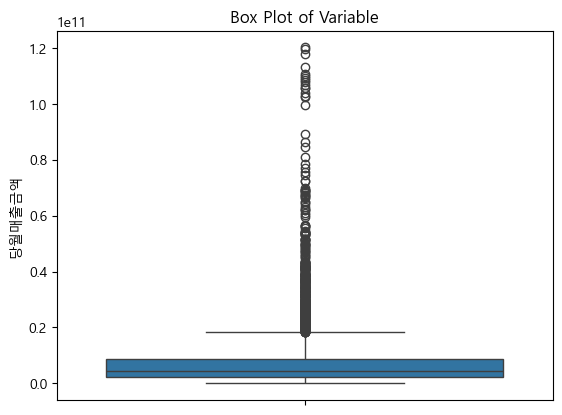

C:\Users\5016s\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


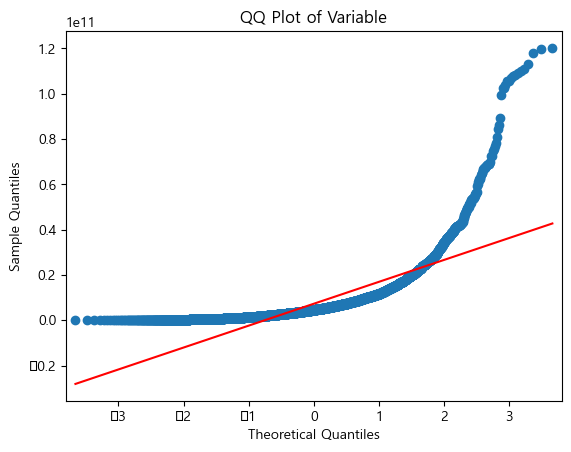

In [11]:
#이상치,평균 확인
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.boxplot(data=total2['당월매출금액'])
plt.title("Box Plot of Variable")
plt.show()

#정규분포와 얼마나 가까운지 확인

import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(total2['당월매출금액'], line='s')
plt.title("QQ Plot of Variable")
plt.show()

In [12]:

#선형회귀 변수추출
x1 =total2[['월평균소득금액', '음식지출총금액', '유사업종점포수','개업점포수', '폐업점포수', '총직장인구수', '총상주인구수', '총유동인구수', '환산전체', '환산1층', '환산그외']]
#y1,y2

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#정규화
#z-score
scaler = StandardScaler()
x1_zscore= scaler.fit_transform(x1)
#y1_zscore= scaler.fit_transform(y1)
#y2_zscore= scaler.fit_transform(y2)


#정규화된 데이터프레임 생성_x
x1_zscore = pd.DataFrame(x1_zscore, columns=x1.columns)
x1_zscore


,월평균소득금액,음식지출총금액,유사업종점포수,개업점포수,폐업점포수,총직장인구수,총상주인구수,총유동인구수,환산전체,환산1층,환산그외
0,0.280523,-0.281452,-0.454657,-0.561528,-0.219053,-0.311682,-1.105314,-0.423291,-0.256396,-0.377471,-0.062754
1,0.269871,-0.695016,-0.950924,-0.895095,-0.401866,-0.461297,-0.780745,-0.482684,0.287411,0.478379,0.006028
2,0.164785,-0.640626,-0.790838,-0.561528,-0.950303,-0.451216,-0.525610,-0.408777,-0.780738,-0.579689,-0.854229
3,0.588701,-0.666835,-0.742812,-0.061178,-0.401866,-0.277917,-0.874961,-0.752834,-0.803684,-1.119730,-0.270496
4,-0.263952,-0.515147,-0.486674,-0.895095,-0.767490,-0.358787,-0.501046,-0.299522,-0.773588,-0.545724,-0.879810
...,...,...,...,...,...,...,...,...,...,...,...
7950,0.540778,-0.021911,-0.254550,0.105605,0.146572,-0.062163,0.932387,0.178604,-0.473096,-0.351722,-0.517137
7951,1.903581,1.290688,0.922082,1.439871,0.695009,2.444631,-0.629323,0.382547,1.575322,1.502737,1.335930
7952,0.743139,1.992841,1.258263,1.606655,0.877821,0.943127,-0.239251,1.487855,1.076519,0.887985,1.074645
7953,1.227237,-0.047857,-0.222533,-0.895095,-0.219053,0.444784,-0.027893,0.305011,-0.195176,-0.139715,-0.219630


In [13]:
y1 = total2[['당월매출금액']]
y1_zscore= scaler.fit_transform(y1)
y1_zscore = pd.DataFrame(y1_zscore, columns=y1.columns)
y1_zscore

,당월매출금액
0,-0.307898
1,-0.708254
2,-0.635853
3,-0.641354
4,-0.380439
...,...
7950,0.080554
7951,2.466979
7952,3.757196
7953,0.435946


In [14]:
# 회귀 모델 생성
model = sm.OLS(y1_zscore, x1_zscore).fit()

# 회귀 결과 출력
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 당월매출금액   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              5012.
Date:                Tue, 28 May 2024   Prob (F-statistic):                        0.00
Time:                        09:10:52   Log-Likelihood:                         -3046.4
No. Observations:                7955   AIC:                                      6115.
Df Residuals:                    7944   BIC:                                      6192.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 독립 변수와 종속 변수 설정
X = total2[['월평균소득금액', '음식지출총금액', '유사업종점포수','개업점포수', '폐업점포수', '총직장인구수', '총상주인구수', '총유동인구수', '환산전체','환산1층', '환산그외']]
y = total2['당월매출금액']

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


    Feature           VIF
0   월평균소득금액  1.764597e+01
1   음식지출총금액 -9.473204e-04
2   유사업종점포수  2.096075e+01
3     개업점포수  6.677043e+00
4     폐업점포수  8.238589e+00
5    총직장인구수  2.487496e+00
6    총상주인구수  1.037063e+01
7    총유동인구수  9.732894e+00
8      환산전체  1.200128e+11
9      환산1층  4.408940e+10
10     환산그외  2.004326e+10


xgboost

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error: 2.553825514113354e+18
R^2 Score: 0.972712652179304
[learning_curve] Training set sizes: [ 509 1018 1527 2036 2545 3054 3563 4072 4581 5091]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  50 | elapsed:    1.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.2s finished


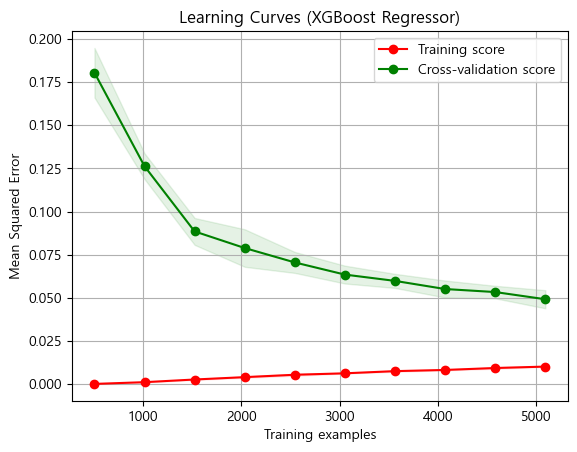

In [16]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 독립 변수와 종속 변수 설정
X = total2[['월평균소득금액', '음식지출총금액', '유사업종점포수','개업점포수', '폐업점포수', '총직장인구수', '총상주인구수', '총유동인구수', '환산전체','환산1층', '환산그외']]
y = total2['당월매출금액']


# 타겟 값 로그 변환
y_log = np.log1p(y)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# XGBoost 회귀 모델 생성
model = xgb.XGBRegressor(n_estimators=1000)

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# 그리드 서치 수행
grid_search.fit(X_train_scaled, y_train)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# 테스트 세트로 예측 수행
y_pred = best_model.predict(X_test_scaled)

# 로그 변환을 되돌리기 위해 지수 변환 적용
y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)

# 성능 평가
mse = mean_squared_error(y_test_exp, y_pred_exp)
r2 = r2_score(y_test_exp, y_pred_exp)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# 학습 곡선 데이터 계산
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), verbose=2
)

# 학습 곡선 데이터 평균 및 표준 편차 계산
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 학습 곡선 시각화
plt.figure()
plt.title("Learning Curves (XGBoost Regressor)")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.grid()

# 학습 곡선
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

#교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

#교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


#과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

Train CV MSE: 0.04933904517735043
Test CV MSE: 0.11465103953381324
과적합 아닙니다


In [88]:
ran_for = pd.read_csv('./final_randomforest.csv', encoding='utf-8')

In [89]:
ran_for

,행정동코드,median,월평균소득금액,음식지출총금액,유사업종점포수,총직장인구수,총상주인구수,총유동인구수,prediction_rf,Unnamed: 0,기준년분기코드,개업점포수,폐업점포수,당월매출금액,success
0,11110515,2.381122e+09,3780222,1122210000,93,10628,13009,3555653,4.489267e+09,353,20231,3,3,4044405878,1
1,11110515,2.381122e+09,3780222,857237000,89,10628,12434,3595242,3.553289e+09,6214,20213,8,3,2381121646,1
2,11110515,2.381122e+09,3780222,1144297000,91,10628,13009,3605198,4.355294e+09,1328,20234,1,3,4460778790,1
3,11110515,2.381122e+09,3780222,753487000,86,10628,12817,3670575,2.200025e+09,4535,20203,3,1,1994561799,0
4,11110515,2.381122e+09,4015674,744564000,83,7211,13047,3668225,2.491658e+09,1840,20191,2,2,1941079055,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,11740700,6.144456e+09,3414406,1213355000,102,4961,27231,7202398,6.250276e+09,1691,20234,3,4,6144455570,1
1662,11740700,6.144456e+09,3414406,942422000,107,4961,26347,7695774,4.896190e+09,6569,20214,3,3,5519835765,0
1663,11740700,6.144456e+09,3603496,1098479000,119,8575,28372,7944260,5.241426e+09,2751,20193,7,2,5178034962,0
1664,11740700,6.144456e+09,3414406,1231208000,106,4961,27231,7029016,6.305019e+09,693,20232,4,3,6781053940,1


In [18]:
# 예측값과 실제값 데이터프레임 생성
result_df = pd.DataFrame({'Actual': y_test_exp, 'Predicted': y_pred_exp})

# 예측값과 실제값을 데이터프레임으로 합치기
result_df = pd.concat([X_test, result_df], axis=1)

# 결과 출력
display(result_df)


,월평균소득금액,음식지출총금액,유사업종점포수,개업점포수,폐업점포수,총직장인구수,총상주인구수,총유동인구수,환산전체,환산1층,환산그외,Actual,Predicted
1650,2722774,800191000,93,1,6,1421,12359,5800073,100194,148726,51663,2.302044e+09,2.655756e+09
3182,3333112,2043928000,230,5,3,6669,16799,7888102,117679,153779,81579,6.392837e+09,7.997607e+09
251,2747467,2109396000,194,15,9,2498,23709,7236595,106667,123159,90175,3.719447e+09,6.339879e+09
453,3416366,1282355000,137,11,8,3314,30158,4433577,99016,133751,64281,6.114087e+09,4.370082e+09
6821,3682946,3787935000,173,4,1,13034,7126,2641988,182180,213394,150966,9.117762e+09,9.109580e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,4622839,441903000,84,0,0,3997,15900,2116351,119337,145136,93539,1.946475e+09,1.858892e+09
5138,3225725,3601761000,222,3,7,10344,15664,6199575,152235,187553,116917,1.021334e+10,1.148157e+10
1593,3381883,1306234000,156,5,3,22158,40147,11528475,79773,97690,61856,6.129527e+09,6.657748e+09
2184,5384412,267486000,21,0,0,18155,25265,1871358,146547,204418,88675,1.463828e+08,1.347743e+08


In [22]:
result_df.drop(['Actual'], axis=1, inplace=True)

In [23]:
new_total = total2.merge(result_df, on=['월평균소득금액', '음식지출총금액', '유사업종점포수','개업점포수', '폐업점포수', '총직장인구수', '총상주인구수', '총유동인구수', '환산전체','환산1층', '환산그외'], how = 'inner')

In [115]:
new_total.drop(['Actual'], axis= 1, inplace=True)

In [24]:
new_total

,기준년분기코드,행정동코드,월평균소득금액,음식지출총금액,유사업종점포수,개업점포수,폐업점포수,당월매출금액,총직장인구수,총상주인구수,총유동인구수,환산전체,환산1층,환산그외,Predicted
0,20191,11290525,3664622,1011937000,90,2,4,4328200306,4429,12823,4444697,103305,119698,86911,3.227045e+09
1,20191,11110540,3772087,884788000,79,1,4,4569768323,3997,2831,1010831,238289,197561,279017,4.232584e+09
2,20191,11680640,3747340,20051983000,1104,49,50,64954932801,192833,35362,23188491,135934,147116,124753,7.132814e+10
3,20191,11590640,3954608,761344000,74,1,1,2611009529,2689,24423,4932708,100871,142486,59256,2.752336e+09
4,20191,11590520,2461079,1301028000,117,4,8,10558758018,5545,14606,4131564,123865,163280,84450,7.415209e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,20234,11710540,2435636,251428000,89,4,4,1695955926,955,22624,3625768,80056,81689,78423,1.740890e+09
1587,20234,11710562,2928271,7551205000,343,21,15,43408131557,24911,24312,6510592,136490,159794,113185,2.856426e+10
1588,20234,11710632,3910198,1526342000,115,6,6,8085087192,10171,31488,6197742,94031,121008,67053,6.599250e+09
1589,20234,11650621,4557937,1474917000,119,0,4,11522249834,21837,22692,6565906,105925,131794,80055,8.597791e+09


In [25]:
median = new_total.groupby('행정동코드')[['당월매출금액']].median().reset_index().rename(columns={'당월매출금액' : 'median'})

In [26]:
final = median.merge(new_total, on = ['행정동코드'], how='inner')

In [27]:
final

,행정동코드,median,기준년분기코드,월평균소득금액,음식지출총금액,유사업종점포수,개업점포수,폐업점포수,당월매출금액,총직장인구수,총상주인구수,총유동인구수,환산전체,환산1층,환산그외,Predicted
0,11110515,2.111868e+09,20192,4015674,836137000,83,2,2,2111867516,10997,13030,2552571,110935,144858,77012,3.546413e+09
1,11110515,2.111868e+09,20201,3780222,636006000,83,1,7,2061038996,10628,12817,3612274,130611,165848,95374,2.900959e+09
2,11110515,2.111868e+09,20202,3780222,787974000,84,1,0,2102339126,10628,12817,3706408,131133,160242,102023,2.768083e+09
3,11110515,2.111868e+09,20212,3780222,936908000,84,3,6,2756910122,10628,12434,3759011,125839,163704,87974,2.788607e+09
4,11110515,2.111868e+09,20213,3780222,857237000,89,8,3,2381121646,10628,12434,3595242,131721,183465,79977,3.078745e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,11740700,5.213130e+09,20202,3414406,1101926000,115,2,4,5637562521,4961,27648,7665678,75480,98771,52189,5.066068e+09
1587,11740700,5.213130e+09,20211,3414406,875129000,113,2,2,4046773043,4961,26347,6941531,76921,104173,49670,4.123983e+09
1588,11740700,5.213130e+09,20222,3414406,1122368000,106,2,5,6441320449,4961,26347,7182157,81769,113461,50077,4.681926e+09
1589,11740700,5.213130e+09,20223,3414406,1191852000,104,2,4,6522555125,4961,26347,7207926,93867,109900,77833,5.061346e+09


In [28]:
final['success'] = final.apply(lambda row: 0 if row['median'] > row['Predicted'] else 1, axis=1)

In [29]:
final

,행정동코드,median,기준년분기코드,월평균소득금액,음식지출총금액,유사업종점포수,개업점포수,폐업점포수,당월매출금액,총직장인구수,총상주인구수,총유동인구수,환산전체,환산1층,환산그외,Predicted,success
0,11110515,2.111868e+09,20192,4015674,836137000,83,2,2,2111867516,10997,13030,2552571,110935,144858,77012,3.546413e+09,1
1,11110515,2.111868e+09,20201,3780222,636006000,83,1,7,2061038996,10628,12817,3612274,130611,165848,95374,2.900959e+09,1
2,11110515,2.111868e+09,20202,3780222,787974000,84,1,0,2102339126,10628,12817,3706408,131133,160242,102023,2.768083e+09,1
3,11110515,2.111868e+09,20212,3780222,936908000,84,3,6,2756910122,10628,12434,3759011,125839,163704,87974,2.788607e+09,1
4,11110515,2.111868e+09,20213,3780222,857237000,89,8,3,2381121646,10628,12434,3595242,131721,183465,79977,3.078745e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,11740700,5.213130e+09,20202,3414406,1101926000,115,2,4,5637562521,4961,27648,7665678,75480,98771,52189,5.066068e+09,0
1587,11740700,5.213130e+09,20211,3414406,875129000,113,2,2,4046773043,4961,26347,6941531,76921,104173,49670,4.123983e+09,0
1588,11740700,5.213130e+09,20222,3414406,1122368000,106,2,5,6441320449,4961,26347,7182157,81769,113461,50077,4.681926e+09,0
1589,11740700,5.213130e+09,20223,3414406,1191852000,104,2,4,6522555125,4961,26347,7207926,93867,109900,77833,5.061346e+09,0


In [35]:
final.to_csv('./ffinal_xgboost.csv', index=False, encoding='utf-8')

In [4]:
import pandas as pd
final = pd.read_csv('./final_xgboost.csv', encoding='utf-8')

In [32]:
final.success.mean()

0.5065996228786926

In [34]:
import pickle

# 모델 저장
with open('final_xgboost_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)